In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ldlr KO

In [2]:
ldlr_metadata = pd.read_csv('../data/ApoE_LdlR/ApoE_LdlR_metadata.txt', 
                            sep='\t', usecols=['sample_name', 'title', 'tube_id', 'timepoint', 'zt', 'collection_date'], index_col=0)
ldlr_metadata.head()

,collection_date,timepoint,title,tube_id,zt
sample_name,,,,,
12473.123La.TP1,8/31/18 22:00,1.0,Apoe_TRF,123L_TP1,16.0
12473.123La.TP2,8/31/18 2:00,2.0,Apoe_TRF,123L_TP2,20.0
12473.123La.TP3,8/31/18 6:00,3.0,Apoe_TRF,123L_TP3,0.0
12473.123La.TP4,8/31/18 10:00,4.0,Apoe_TRF,123L_TP4,4.0
12473.123La.TP5,8/31/18 14:00,5.0,Apoe_TRF,123L_TP5,8.0


In [3]:
ldlr_metadata['stage'] = ldlr_metadata['collection_date'].apply(lambda ele: "Early" if "/18" in ele else "Late" )
ldlr_metadata

,collection_date,timepoint,title,tube_id,zt,stage
sample_name,,,,,,
12473.123La.TP1,8/31/18 22:00,1.0,Apoe_TRF,123L_TP1,16.0,Early
12473.123La.TP2,8/31/18 2:00,2.0,Apoe_TRF,123L_TP2,20.0,Early
12473.123La.TP3,8/31/18 6:00,3.0,Apoe_TRF,123L_TP3,0.0,Early
12473.123La.TP4,8/31/18 10:00,4.0,Apoe_TRF,123L_TP4,4.0,Early
12473.123La.TP5,8/31/18 14:00,5.0,Apoe_TRF,123L_TP5,8.0,Early
...,...,...,...,...,...,...
12473.BLANK3.9D,not applicable,NaN,Ldlr_adlib,not applicable,NaN,Late
12473.BLANK3.9E,not applicable,NaN,Ldlr_adlib,not applicable,NaN,Late
12473.BLANK3.9F,not applicable,NaN,Ldlr_adlib,not applicable,NaN,Late


In [4]:
ldlr_metadata.drop(columns=['collection_date'], inplace=True)

In [5]:
ldlr_wUF_dm = pd.read_csv('../data/ApoE_LdlR/distance_matrix_weighted_unifrac.tsv', sep='\t', index_col=0)
ldlr_wUF_dm.head()

,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,12473.130Nb.TP1,12473.131La.TP2,12473.131Nb.TP1,12473.131Nb.TP6,12473.131La.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
12473.130Nb.TP6,0.000000,0.097456,0.178291,0.239012,0.174862,0.056933,0.245705,0.124351,0.093296,0.217713,...,0.162031,0.054753,0.166603,0.102149,0.144712,0.106010,0.132359,0.167528,0.193591,0.132670
12473.130Ra.TP2,0.097456,0.000000,0.137785,0.211790,0.168510,0.120607,0.225200,0.119837,0.104188,0.209656,...,0.119109,0.106095,0.158432,0.087544,0.118845,0.092806,0.117867,0.151992,0.228527,0.116524
12473.133Na.TP3,0.178291,0.137785,0.000000,0.152035,0.142772,0.189405,0.168787,0.154864,0.129699,0.221762,...,0.144320,0.185753,0.169341,0.105454,0.134007,0.136555,0.156923,0.168574,0.221382,0.164041
12473.133Na.TP4,0.239012,0.211790,0.152035,0.000000,0.163518,0.259412,0.131187,0.177619,0.192724,0.146854,...,0.174575,0.242882,0.163598,0.196250,0.172471,0.186487,0.176273,0.158155,0.265997,0.197094
12473.130Ra.TP5,0.174862,0.168510,0.142772,0.163518,0.000000,0.183772,0.174589,0.122060,0.137579,0.177234,...,0.123020,0.173416,0.153680,0.150506,0.180395,0.172611,0.136223,0.143860,0.236531,0.183944


In [6]:
named_wUF_dm = pd.merge(ldlr_metadata, ldlr_wUF_dm, left_index=True, right_index=True)
named_wUF_dm.head()

,timepoint,title,tube_id,zt,stage,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
12473.130Na.TP1,1.0,Ldlr_TRF,130N_TP1,16.0,Early,0.231446,0.211044,0.173860,0.147959,0.111194,...,0.160464,0.223148,0.150439,0.192238,0.184970,0.197920,0.179296,0.142433,0.255341,0.195730
12473.130Na.TP2,2.0,Ldlr_TRF,130N_TP2,20.0,Early,0.099258,0.089837,0.142610,0.230513,0.170345,...,0.143438,0.104109,0.169758,0.076768,0.154416,0.114963,0.151458,0.177548,0.228366,0.146998
12473.130Na.TP3,3.0,Ldlr_TRF,130N_TP3,0.0,Early,0.164214,0.145488,0.139657,0.167017,0.107630,...,0.123531,0.156572,0.135496,0.119429,0.166459,0.143738,0.145106,0.153099,0.243218,0.170721
12473.130Na.TP4,4.0,Ldlr_TRF,130N_TP4,4.0,Early,0.356851,0.346953,0.282264,0.208024,0.217766,...,0.283434,0.345580,0.261325,0.311363,0.304387,0.311441,0.292057,0.257063,0.317698,0.325208
12473.130Na.TP5,5.0,Ldlr_TRF,130N_TP5,8.0,Early,0.175508,0.169301,0.118615,0.146921,0.117157,...,0.140699,0.173233,0.105984,0.131134,0.128904,0.143589,0.147203,0.137877,0.210770,0.157911


In [7]:
named_wUF_dm['group_time'] = named_wUF_dm['title'].str.split('_').str[1].astype(str) + "_" + named_wUF_dm['zt'].astype(str) + '_' + named_wUF_dm['stage'].astype(str)

In [8]:
gt_wUF_dm = named_wUF_dm[['group_time']].copy()
gt_wUF_dm.head()

,group_time
12473.130Na.TP1,TRF_16.0_Early
12473.130Na.TP2,TRF_20.0_Early
12473.130Na.TP3,TRF_0.0_Early
12473.130Na.TP4,TRF_4.0_Early
12473.130Na.TP5,TRF_8.0_Early


In [9]:
named_wUF_dm = named_wUF_dm.set_index('group_time')
named_wUF_dm

,timepoint,title,tube_id,zt,stage,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
group_time,,,,,,,,,,,,,,,,,,,,,
TRF_16.0_Early,1.0,Ldlr_TRF,130N_TP1,16.0,Early,0.231446,0.211044,0.173860,0.147959,0.111194,...,0.160464,0.223148,0.150439,0.192238,0.184970,0.197920,0.179296,0.142433,0.255341,0.195730
TRF_20.0_Early,2.0,Ldlr_TRF,130N_TP2,20.0,Early,0.099258,0.089837,0.142610,0.230513,0.170345,...,0.143438,0.104109,0.169758,0.076768,0.154416,0.114963,0.151458,0.177548,0.228366,0.146998
TRF_0.0_Early,3.0,Ldlr_TRF,130N_TP3,0.0,Early,0.164214,0.145488,0.139657,0.167017,0.107630,...,0.123531,0.156572,0.135496,0.119429,0.166459,0.143738,0.145106,0.153099,0.243218,0.170721
TRF_4.0_Early,4.0,Ldlr_TRF,130N_TP4,4.0,Early,0.356851,0.346953,0.282264,0.208024,0.217766,...,0.283434,0.345580,0.261325,0.311363,0.304387,0.311441,0.292057,0.257063,0.317698,0.325208
TRF_8.0_Early,5.0,Ldlr_TRF,130N_TP5,8.0,Early,0.175508,0.169301,0.118615,0.146921,0.117157,...,0.140699,0.173233,0.105984,0.131134,0.128904,0.143589,0.147203,0.137877,0.210770,0.157911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adlib_20.0_Late,2.0,Ldlr_adlib,133R_TP2,20.0,Late,0.365823,0.375546,0.384904,0.408862,0.394009,...,0.387382,0.361431,0.395238,0.376360,0.401079,0.369951,0.402246,0.411739,0.363181,0.404360
adlib_0.0_Late,3.0,Ldlr_adlib,133R_TP3,0.0,Late,0.102149,0.087544,0.105454,0.196250,0.150506,...,0.145334,0.111849,0.150436,0.000000,0.138877,0.099994,0.141176,0.160346,0.222596,0.137623
adlib_4.0_Late,4.0,Ldlr_adlib,133R_TP4,4.0,Late,0.155875,0.152891,0.155681,0.185569,0.171459,...,0.164637,0.152930,0.088566,0.159533,0.085175,0.101074,0.099324,0.113473,0.144869,0.118369


In [10]:
named_wUF_dm2 = named_wUF_dm.drop(columns=['title', 'tube_id', 'timepoint', 'zt', 'stage'])
named_wUF_dm2

,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,12473.130Nb.TP1,12473.131La.TP2,12473.131Nb.TP1,12473.131Nb.TP6,12473.131La.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
group_time,,,,,,,,,,,,,,,,,,,,,
TRF_16.0_Early,0.231446,0.211044,0.173860,0.147959,0.111194,0.249101,0.119523,0.170033,0.195530,0.131998,...,0.160464,0.223148,0.150439,0.192238,0.184970,0.197920,0.179296,0.142433,0.255341,0.195730
TRF_20.0_Early,0.099258,0.089837,0.142610,0.230513,0.170345,0.103020,0.240749,0.141150,0.131722,0.222251,...,0.143438,0.104109,0.169758,0.076768,0.154416,0.114963,0.151458,0.177548,0.228366,0.146998
TRF_0.0_Early,0.164214,0.145488,0.139657,0.167017,0.107630,0.180995,0.192760,0.141418,0.156450,0.193356,...,0.123531,0.156572,0.135496,0.119429,0.166459,0.143738,0.145106,0.153099,0.243218,0.170721
TRF_4.0_Early,0.356851,0.346953,0.282264,0.208024,0.217766,0.360860,0.216759,0.286623,0.316199,0.232811,...,0.283434,0.345580,0.261325,0.311363,0.304387,0.311441,0.292057,0.257063,0.317698,0.325208
TRF_8.0_Early,0.175508,0.169301,0.118615,0.146921,0.117157,0.192966,0.148904,0.143069,0.147912,0.160289,...,0.140699,0.173233,0.105984,0.131134,0.128904,0.143589,0.147203,0.137877,0.210770,0.157911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adlib_20.0_Late,0.365823,0.375546,0.384904,0.408862,0.394009,0.356505,0.419641,0.400825,0.383537,0.408323,...,0.387382,0.361431,0.395238,0.376360,0.401079,0.369951,0.402246,0.411739,0.363181,0.404360
adlib_0.0_Late,0.102149,0.087544,0.105454,0.196250,0.150506,0.122770,0.208184,0.131525,0.114009,0.215664,...,0.145334,0.111849,0.150436,0.000000,0.138877,0.099994,0.141176,0.160346,0.222596,0.137623
adlib_4.0_Late,0.155875,0.152891,0.155681,0.185569,0.171459,0.161487,0.166471,0.095492,0.110915,0.116095,...,0.164637,0.152930,0.088566,0.159533,0.085175,0.101074,0.099324,0.113473,0.144869,0.118369


In [11]:
rn_wUF_dm = pd.merge(named_wUF_dm2.T, gt_wUF_dm, left_index=True, right_index=True)
rn_wUF_dm2 = rn_wUF_dm.set_index('group_time')
rn_wUF_dm2

,TRF_16.0_Early,TRF_20.0_Early,TRF_0.0_Early,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Late,TRF_20.0_Late,TRF_0.0_Late,TRF_4.0_Late,...,adlib_0.0_Early,adlib_4.0_Early,adlib_8.0_Early,adlib_12.0_Early,adlib_16.0_Late,adlib_20.0_Late,adlib_0.0_Late,adlib_4.0_Late,adlib_8.0_Late,adlib_12.0_Late
group_time,,,,,,,,,,,,,,,,,,,,,
TRF_12.0_Late,0.231446,0.099258,0.164214,0.356851,0.175508,0.214363,0.056933,0.054753,0.094771,0.186832,...,0.238859,0.212979,0.138935,0.198613,0.117614,0.365823,0.102149,0.155875,0.211579,0.116438
TRF_20.0_Early,0.211044,0.089837,0.145488,0.346953,0.169301,0.214971,0.120607,0.106095,0.114719,0.193580,...,0.187070,0.199542,0.115319,0.177364,0.100571,0.375546,0.087544,0.152891,0.203747,0.105582
adlib_0.0_Early,0.173860,0.142610,0.139657,0.282264,0.118615,0.164392,0.189405,0.185753,0.151165,0.197672,...,0.121308,0.154789,0.094153,0.121990,0.135171,0.384904,0.105454,0.155681,0.188639,0.123941
adlib_4.0_Early,0.147959,0.230513,0.167017,0.208024,0.146921,0.146623,0.259412,0.242882,0.204785,0.209567,...,0.216414,0.162802,0.170143,0.127993,0.187011,0.408862,0.196250,0.185569,0.149166,0.167658
TRF_8.0_Early,0.111194,0.170345,0.107630,0.217766,0.117157,0.101055,0.183772,0.173416,0.146103,0.140655,...,0.201494,0.150344,0.138053,0.110278,0.196317,0.394009,0.150506,0.171459,0.149594,0.149517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adlib_4.0_Late,0.197920,0.114963,0.143738,0.311441,0.143589,0.192999,0.118203,0.105034,0.099168,0.188205,...,0.214791,0.189871,0.080745,0.152149,0.065259,0.369951,0.099994,0.101074,0.158710,0.073893
TRF_20.0_Late,0.179296,0.151458,0.145106,0.292057,0.147203,0.186019,0.134779,0.130482,0.120494,0.161000,...,0.228848,0.166966,0.139713,0.147922,0.113422,0.402246,0.141176,0.099324,0.153973,0.088053
TRF_8.0_Late,0.142433,0.177548,0.153099,0.257063,0.137877,0.160486,0.184408,0.169211,0.136808,0.148925,...,0.236645,0.133793,0.149165,0.135872,0.139394,0.411739,0.160346,0.113473,0.125761,0.101595


In [12]:
al_wUF_dm = rn_wUF_dm2.filter(regex='adlib', axis=0)
alt_wUF_dm = al_wUF_dm.filter(regex='TRF', axis=1)
alt_wUF_dm.shape

(48, 47)

In [13]:
alt_wUF_dm.head()

,TRF_16.0_Early,TRF_20.0_Early,TRF_0.0_Early,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Late,TRF_20.0_Late,TRF_0.0_Late,TRF_4.0_Late,...,TRF_20.0_Early,TRF_0.0_Early,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Late,TRF_20.0_Late,TRF_4.0_Late,TRF_8.0_Late,TRF_12.0_Late
group_time,,,,,,,,,,,,,,,,,,,,,
adlib_0.0_Early,0.173860,0.142610,0.139657,0.282264,0.118615,0.164392,0.189405,0.185753,0.151165,0.197672,...,0.276226,0.120454,0.227072,0.163423,0.098865,0.154864,0.156923,0.220820,0.168574,0.129699
adlib_4.0_Early,0.147959,0.230513,0.167017,0.208024,0.146921,0.146623,0.259412,0.242882,0.204785,0.209567,...,0.299796,0.207395,0.162735,0.161716,0.177256,0.177619,0.176273,0.125449,0.158155,0.192724
adlib_8.0_Early,0.171910,0.108126,0.115180,0.280468,0.108555,0.146811,0.148393,0.134894,0.092412,0.187389,...,0.326691,0.105587,0.240831,0.156378,0.087647,0.130437,0.139713,0.241061,0.149165,0.120716
adlib_20.0_Early,0.198594,0.166626,0.131094,0.286487,0.142509,0.184401,0.198840,0.204516,0.163185,0.195085,...,0.241018,0.150312,0.208591,0.178095,0.155916,0.163784,0.156947,0.218820,0.165947,0.166776
adlib_16.0_Late,0.197450,0.135249,0.158595,0.310921,0.146072,0.191389,0.146414,0.144734,0.118014,0.201371,...,0.303278,0.113200,0.247159,0.191894,0.123983,0.108118,0.112669,0.235332,0.122971,0.095699


In [14]:
wufdm = alt_wUF_dm.copy()
wufdm2 = wufdm.stack().reset_index()
wufdm2.columns = ['AdLib','TRF','wUF_distance']
wufdm2

,AdLib,TRF,wUF_distance
0,adlib_0.0_Early,TRF_16.0_Early,0.173860
1,adlib_0.0_Early,TRF_20.0_Early,0.142610
2,adlib_0.0_Early,TRF_0.0_Early,0.139657
3,adlib_0.0_Early,TRF_4.0_Early,0.282264
4,adlib_0.0_Early,TRF_8.0_Early,0.118615
...,...,...,...
2251,adlib_0.0_Late,TRF_16.0_Late,0.161566
2252,adlib_0.0_Late,TRF_20.0_Late,0.167139
2253,adlib_0.0_Late,TRF_4.0_Late,0.304193
2254,adlib_0.0_Late,TRF_8.0_Late,0.182865


In [15]:
wufdm2['timepoints'] = wufdm2['AdLib'].str.split('_').str[1] + "_" + wufdm2['TRF'].str.split('_').str[1]
wufdm2.timepoints.unique()

array(['0.0_16.0', '0.0_20.0', '0.0_0.0', '0.0_4.0', '0.0_8.0',
       '0.0_12.0', '4.0_16.0', '4.0_20.0', '4.0_0.0', '4.0_4.0',
       '4.0_8.0', '4.0_12.0', '8.0_16.0', '8.0_20.0', '8.0_0.0',
       '8.0_4.0', '8.0_8.0', '8.0_12.0', '20.0_16.0', '20.0_20.0',
       '20.0_0.0', '20.0_4.0', '20.0_8.0', '20.0_12.0', '16.0_16.0',
       '16.0_20.0', '16.0_0.0', '16.0_4.0', '16.0_8.0', '16.0_12.0',
       '12.0_16.0', '12.0_20.0', '12.0_0.0', '12.0_4.0', '12.0_8.0',
       '12.0_12.0'], dtype=object)

In [16]:
zt_tps = ['4.0_4.0', '8.0_8.0', '12.0_12.0', '16.0_16.0', '20.0_20.0', '0.0_0.0']

In [17]:
wufdm3 = wufdm2.loc[wufdm2['timepoints'].isin(zt_tps)]
wufdm3

,AdLib,TRF,wUF_distance,timepoints
2,adlib_0.0_Early,TRF_0.0_Early,0.139657,0.0_0.0
8,adlib_0.0_Early,TRF_0.0_Late,0.151165,0.0_0.0
14,adlib_0.0_Early,TRF_0.0_Early,0.127066,0.0_0.0
20,adlib_0.0_Early,TRF_0.0_Late,0.193109,0.0_0.0
26,adlib_0.0_Early,TRF_0.0_Early,0.154786,0.0_0.0
...,...,...,...,...
2223,adlib_0.0_Late,TRF_0.0_Early,0.200324,0.0_0.0
2229,adlib_0.0_Late,TRF_0.0_Late,0.229275,0.0_0.0
2235,adlib_0.0_Late,TRF_0.0_Early,0.190198,0.0_0.0
2241,adlib_0.0_Late,TRF_0.0_Late,0.278716,0.0_0.0


In [18]:
wufdm4 = wufdm3.copy()
wufdm4['ZT'] = wufdm4['timepoints'].str.split('_').str[-1]
wufdm4['Controls'] = wufdm4['AdLib'].str.split('_').str[0]
wufdm4['Experimentals'] = wufdm4['TRF'].str.split('_').str[0]
wufdm4['AdLib_Stage'] = wufdm4['AdLib'].str.split('_').str[2]
wufdm4['TRF_Stage'] = wufdm4['TRF'].str.split('_').str[2]
wufdm4

,AdLib,TRF,wUF_distance,timepoints,ZT,Controls,Experimentals,AdLib_Stage,TRF_Stage
2,adlib_0.0_Early,TRF_0.0_Early,0.139657,0.0_0.0,0.0,adlib,TRF,Early,Early
8,adlib_0.0_Early,TRF_0.0_Late,0.151165,0.0_0.0,0.0,adlib,TRF,Early,Late
14,adlib_0.0_Early,TRF_0.0_Early,0.127066,0.0_0.0,0.0,adlib,TRF,Early,Early
20,adlib_0.0_Early,TRF_0.0_Late,0.193109,0.0_0.0,0.0,adlib,TRF,Early,Late
26,adlib_0.0_Early,TRF_0.0_Early,0.154786,0.0_0.0,0.0,adlib,TRF,Early,Early
...,...,...,...,...,...,...,...,...,...
2223,adlib_0.0_Late,TRF_0.0_Early,0.200324,0.0_0.0,0.0,adlib,TRF,Late,Early
2229,adlib_0.0_Late,TRF_0.0_Late,0.229275,0.0_0.0,0.0,adlib,TRF,Late,Late
2235,adlib_0.0_Late,TRF_0.0_Early,0.190198,0.0_0.0,0.0,adlib,TRF,Late,Early
2241,adlib_0.0_Late,TRF_0.0_Late,0.278716,0.0_0.0,0.0,adlib,TRF,Late,Late


In [19]:
wufdm5 = wufdm4.loc[wufdm4['AdLib_Stage'] == wufdm4['TRF_Stage']]
wufdm5.head()

,AdLib,TRF,wUF_distance,timepoints,ZT,Controls,Experimentals,AdLib_Stage,TRF_Stage
2,adlib_0.0_Early,TRF_0.0_Early,0.139657,0.0_0.0,0.0,adlib,TRF,Early,Early
14,adlib_0.0_Early,TRF_0.0_Early,0.127066,0.0_0.0,0.0,adlib,TRF,Early,Early
26,adlib_0.0_Early,TRF_0.0_Early,0.154786,0.0_0.0,0.0,adlib,TRF,Early,Early
38,adlib_0.0_Early,TRF_0.0_Early,0.120454,0.0_0.0,0.0,adlib,TRF,Early,Early
50,adlib_4.0_Early,TRF_4.0_Early,0.208024,4.0_4.0,4.0,adlib,TRF,Early,Early


In [20]:
wufdm5.to_csv('../data/ApoE_LdlR/ApoE_LdlR_wUF_dist_select.txt')

In [21]:
wufdm5.wUF_distance.values.mean()

0.17793443025558534

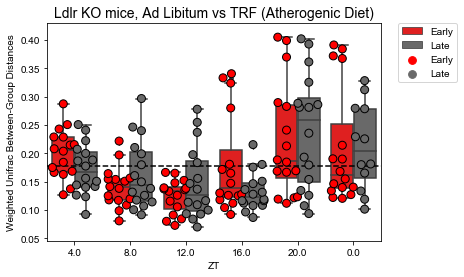

In [22]:
ax = sns.boxplot(x="ZT", y="wUF_distance", hue='TRF_Stage', palette=['red', 'dimgrey'],
                 data=wufdm5, order=['4.0', '8.0', '12.0', '16.0', '20.0', '0.0'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", hue='TRF_Stage', dodge=True,
                   palette=['red', 'dimgrey'], edgecolor='k', linewidth=1, size=8, 
                   data=wufdm5, order=['4.0', '8.0', '12.0', '16.0', '20.0', '0.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Ldlr KO mice, Ad Libitum vs TRF (Atherogenic Diet)', fontsize=14)
ax.axhline(0.17793443025558534, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Ldlr_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

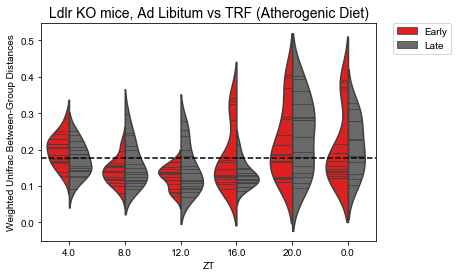

In [23]:
ax = sns.violinplot(x="ZT", y="wUF_distance", hue='TRF_Stage', 
                    order=['4.0', '8.0', '12.0', '16.0', '20.0', '0.0'],
                    data=wufdm5, palette=['red', 'dimgrey'], split=True,
                    scale="count", inner="stick")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Ldlr KO mice, Ad Libitum vs TRF (Atherogenic Diet)', fontsize=14)
ax.axhline(0.17793443025558534, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Ldlr_wUF_dist_violinplot.svg', dpi=300, bbox_inches="tight")

In [24]:
from scipy.stats import wilcoxon
from itertools import combinations

In [25]:
m = wufdm5[wufdm5["TRF_Stage"] == 'Early']
n = wufdm5[wufdm5["TRF_Stage"] == 'Late']

for time in wufdm4.ZT.unique():
    x = m[m['ZT'] == time].wUF_distance.values
    y = n[n['ZT'] == time].wUF_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("early v late", "ZT", time)
        print(p, w)
        print("____________________")
    else:
        print("Not Equal")
        print("____________________")

Not Equal
____________________
early v late ZT 4.0
0.13372989286451814 39.0
____________________
early v late ZT 8.0
0.27753025059514513 47.0
____________________
early v late ZT 20.0
0.5694942779917188 57.0
____________________
early v late ZT 16.0
0.10894087157711467 37.0
____________________
early v late ZT 12.0
0.23432097173768163 45.0
____________________


In [26]:
from scipy.stats import mannwhitneyu

In [27]:
m = wufdm5[wufdm5["TRF_Stage"] == 'Early']
n = wufdm5[wufdm5["TRF_Stage"] == 'Late']

for time in wufdm4.ZT.unique():
    x = m[m['ZT'] == time].wUF_distance.values
    y = n[n['ZT'] == time].wUF_distance.values
    w, p = mannwhitneyu(x, y)
    print("early v late", "ZT", time)
    print(p, w)
    print("____________________")

early v late ZT 0.0
0.4172603200499729 91.0
____________________
early v late ZT 4.0
0.05055792155306855 84.0
____________________
early v late ZT 8.0
0.24282474565903372 109.0
____________________
early v late ZT 20.0
0.3461507681030244 117.0
____________________
early v late ZT 16.0
0.09045529378291262 92.0
____________________
early v late ZT 12.0
0.26701461421216355 111.0
____________________


In [28]:
order = {'4.0': 0, '8.0': 1, '12.0': 2, '16.0': 3, '20.0': 4, '0.0': 5}
wufdm6 = wufdm5.iloc[wufdm5['ZT'].map(order).argsort()]
wufdm6 

,AdLib,TRF,wUF_distance,timepoints,ZT,Controls,Experimentals,AdLib_Stage,TRF_Stage
979,adlib_4.0_Early,TRF_4.0_Early,0.174928,4.0_4.0,4.0,adlib,TRF,Early,Early
896,adlib_4.0_Early,TRF_4.0_Early,0.287385,4.0_4.0,4.0,adlib,TRF,Early,Early
908,adlib_4.0_Early,TRF_4.0_Early,0.214704,4.0_4.0,4.0,adlib,TRF,Early,Early
920,adlib_4.0_Early,TRF_4.0_Early,0.184167,4.0_4.0,4.0,adlib,TRF,Early,Early
932,adlib_4.0_Early,TRF_4.0_Early,0.242913,4.0_4.0,4.0,adlib,TRF,Early,Early
...,...,...,...,...,...,...,...,...,...
1107,adlib_0.0_Early,TRF_0.0_Early,0.140313,0.0_0.0,0.0,adlib,TRF,Early,Early
1119,adlib_0.0_Early,TRF_0.0_Early,0.133856,0.0_0.0,0.0,adlib,TRF,Early,Early
1183,adlib_0.0_Late,TRF_0.0_Late,0.118905,0.0_0.0,0.0,adlib,TRF,Late,Late
1001,adlib_0.0_Early,TRF_0.0_Early,0.189896,0.0_0.0,0.0,adlib,TRF,Early,Early


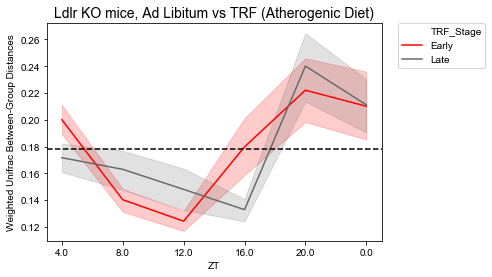

In [29]:
ax = sns.lineplot(x="ZT", y="wUF_distance", hue='TRF_Stage', ci=68, palette=['red', 'dimgrey'],
                 data=wufdm6, sort=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Ldlr KO mice, Ad Libitum vs TRF (Atherogenic Diet)', fontsize=14)
ax.axhline(0.17793443025558534, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Ldlr_wUF_lineplot.svg', dpi=300, bbox_inches="tight")

In [30]:
#ZT16 Early std dev
m = wufdm5[wufdm5["TRF_Stage"] == 'Early']
e_std_dv = m[m['ZT'] == '16.0'].wUF_distance.values
np.std(e_std_dv, dtype=np.float64)

0.08464980752103632

In [43]:
#ZT12 Early std dev
m = wufdm5[wufdm5["TRF_Stage"] == 'Early']
e_std_dv = m[m['ZT'] == '12.0'].wUF_distance.values
np.std(e_std_dv, dtype=np.float64)

0.02881643722602263

In [41]:
#Peak Early mean
m = wufdm5[wufdm5["TRF_Stage"] == 'Early']
m_20mean = m[m['ZT'] == '20.0'].wUF_distance.mean()
m_24mean = m[m['ZT'] == '0.0'].wUF_distance.mean()
print("ZT20", m_20mean)
print("ZT24", m_24mean)

ZT20 0.22209754141677804
ZT24 0.2101423653736627


In [31]:
#ZT16 Late std dev
l_std_dv = n[n['ZT'] == '16.0'].wUF_distance.values
np.std(l_std_dv, dtype=np.float64)

0.032907894312167424

In [44]:
#ZT16 Late std dev
l_std_dv = n[n['ZT'] == '12.0'].wUF_distance.values
np.std(l_std_dv, dtype=np.float64)

0.06245678937032467

In [42]:
#Peak Early mean
n_20mean = n[n['ZT'] == '20.0'].wUF_distance.mean()
n_24mean = n[n['ZT'] == '0.0'].wUF_distance.mean()
print("ZT20", n_20mean)
print("ZT24", n_24mean)

ZT20 0.2401481726854938
ZT24 0.21115562631793164


## Formatting for MetaCycle in R

In [32]:
Rdf = wufdm5[["ZT", "TRF_Stage", "wUF_distance"]].copy()
Rdf = Rdf.sort_values("ZT")
Rdf.set_index("ZT", inplace=True)
Rdf

,TRF_Stage,wUF_distance
ZT,,
0.0,Early,0.139657
0.0,Early,0.391398
0.0,Early,0.367512
0.0,Early,0.168104
0.0,Early,0.189896
...,...,...
8.0,Late,0.138022
8.0,Early,0.153914
8.0,Early,0.221636


In [33]:
Rdf_early = Rdf[Rdf["TRF_Stage"] == 'Early'].copy()
Rdf_late = Rdf[Rdf["TRF_Stage"] == 'Late'].copy()

In [34]:
Rdf_early.rename(columns={"wUF_distance": "Early_wUF_dist"}, inplace=True)
Rdf_late.rename(columns={"wUF_distance": "Late_wUF_dist"}, inplace=True)

In [35]:
Rdf_early.drop(columns=['TRF_Stage'], inplace=True)
Rdf_late.drop(columns=['TRF_Stage'], inplace=True)

In [36]:
Rdf_early.T

ZT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
Early_wUF_dist,0.139657,0.391398,0.367512,0.168104,0.189896,0.214258,0.19031,0.146213,0.140313,0.384401,...,0.108555,0.098586,0.15076,0.119598,0.125024,0.156378,0.153914,0.221636,0.117722,0.080662


In [37]:
Rdf_late.T

ZT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
Late_wUF_dist,0.229275,0.179997,0.312263,0.16516,0.225579,0.279547,0.101334,0.133486,0.328415,0.181189,...,0.240051,0.114111,0.125761,0.131516,0.199131,0.100328,0.091418,0.117307,0.21029,0.138022


In [38]:
Rdf_early.T.to_csv("../data/ApoE_LdlR/MetaCycle/wUF_distance_early_mc.txt", sep='\t')
Rdf_late.T.to_csv("../data/ApoE_LdlR/MetaCycle/wUF_distance_late_mc.txt", sep='\t')